In [ ]:
import math 
from collections import Counter, defaultdict  
from functools import partial

import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report, accuracy_score, \
                            recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler

plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfed = pd.read_csv("/content/drive/MyDrive/Project/ED Real Data/RawData2019csv_CLEANEDfix.csv")

In [ ]:
dfed

,JENIS_KELAMIN,UMUR,RAWAT,RUJUK?,PULANG?,DOR?,DOA?,CARDIAC_ARREST?,CHEST_PAIN?,ABDOMINAL_PAIN?,...,KECELAKAAN_LL?,VERTIGO?,VL?,VE?,HT?,VOMITUS?,DM?,KASUS,KONSUL_SPESIALIS?,TRIASE
0,L,19.0,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,YES,NaN,NaN,NaN,NaN,bedah,NaN,5.0
1,L,53.0,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dalam,NaN,5.0
2,L,22.0,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bedah,NaN,3.0
3,P,20.0,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dalam,NaN,4.0
4,L,44.0,YES,NaN,NaN,NaN,NaN,NaN,NaN,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dalam,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16208,L,18.0,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,umum,NaN,5.0
16209,L,47.0,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dalam,NaN,5.0
16210,L,11.0,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anak,NaN,4.0
16211,P,17.0,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bedah,NaN,5.0


In [ ]:
dfed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16213 entries, 0 to 16212
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   JENIS_KELAMIN            16197 non-null  object 
 1   UMUR                     16145 non-null  float64
 2   RAWAT                    12769 non-null  object 
 3   RUJUK?                   147 non-null    object 
 4   PULANG?                  3265 non-null   object 
 5   DOR?                     111 non-null    object 
 6   DOA?                     18 non-null     object 
 7   CARDIAC_ARREST?          75 non-null     object 
 8   CHEST_PAIN?              199 non-null    object 
 9   ABDOMINAL_PAIN?          929 non-null    object 
 10  EPIGASTRIC_PAIN?         39 non-null     object 
 11  KEJANG?                  235 non-null    object 
 12  DEMAM?                   3737 non-null   object 
 13  ASTHMA?                  307 non-null    object 
 14  MCU?                  

In [ ]:
dfed.isna().sum()

JENIS_KELAMIN                 16
UMUR                          68
RAWAT                       3444
RUJUK?                     16066
PULANG?                    12948
DOR?                       16102
DOA?                       16195
CARDIAC_ARREST?            16138
CHEST_PAIN?                16014
ABDOMINAL_PAIN?            15284
EPIGASTRIC_PAIN?           16174
KEJANG?                    15978
DEMAM?                     12476
ASTHMA?                    15906
MCU?                       15734
CEDERA_KEPALA              15810
PENURUNAN_KESADARAN?       16015
CHRONIC_KIDNEY_DISEASE?    15987
KECELAKAAN_LL?             16010
VERTIGO?                   15756
VL?                        15764
VE?                        15962
HT?                        15657
VOMITUS?                   15306
DM?                        15795
KASUS                         80
KONSUL_SPESIALIS?          12235
TRIASE                        28
dtype: int64

In [ ]:
dfed['JENIS_KELAMIN'].fillna('UNKNOWN',inplace=True)
mean=dfed['UMUR'].mean()
dfed['UMUR'].fillna(mean,inplace=True)
dfed['RAWAT'].fillna('NO',inplace=True)
dfed['RUJUK?'].fillna('NO',inplace=True)
dfed['PULANG?'].fillna('NO',inplace=True)
dfed['DOR?'].fillna('NO',inplace=True)
dfed['DOA?'].fillna('NO',inplace=True)
dfed['CARDIAC_ARREST?'].fillna('NO',inplace=True)
dfed['CHEST_PAIN?'].fillna('NO',inplace=True)
dfed['ABDOMINAL_PAIN?'].fillna('NO',inplace=True)
dfed['EPIGASTRIC_PAIN?'].fillna('NO',inplace=True)
dfed['KEJANG?'].fillna('NO',inplace=True)
dfed['DEMAM?'].fillna('NO',inplace=True)
dfed['ASTHMA?'].fillna('NO',inplace=True)
dfed['MCU?'].fillna('NO',inplace=True)
dfed['CEDERA_KEPALA'].fillna('NO',inplace=True)
dfed['PENURUNAN_KESADARAN?'].fillna('NO',inplace=True)
dfed['CHRONIC_KIDNEY_DISEASE?'].fillna('NO',inplace=True)
dfed['KECELAKAAN_LL?'].fillna('NO',inplace=True)
dfed['VERTIGO?'].fillna('NO',inplace=True)
dfed['VL?'].fillna('NO',inplace=True)
dfed['VE?'].fillna('NO',inplace=True)
dfed['HT?'].fillna('NO',inplace=True)
dfed['VOMITUS?'].fillna('NO',inplace=True)
dfed['DM?'].fillna('NO',inplace=True)
dfed['KASUS'].fillna('UNKNOWN',inplace=True)
dfed['KONSUL_SPESIALIS?'].fillna('NO',inplace=True)
dfed['TRIASE'].fillna(5,inplace=True)
dfed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16213 entries, 0 to 16212
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   JENIS_KELAMIN            16213 non-null  object 
 1   UMUR                     16213 non-null  float64
 2   RAWAT                    16213 non-null  object 
 3   RUJUK?                   16213 non-null  object 
 4   PULANG?                  16213 non-null  object 
 5   DOR?                     16213 non-null  object 
 6   DOA?                     16213 non-null  object 
 7   CARDIAC_ARREST?          16213 non-null  object 
 8   CHEST_PAIN?              16213 non-null  object 
 9   ABDOMINAL_PAIN?          16213 non-null  object 
 10  EPIGASTRIC_PAIN?         16213 non-null  object 
 11  KEJANG?                  16213 non-null  object 
 12  DEMAM?                   16213 non-null  object 
 13  ASTHMA?                  16213 non-null  object 
 14  MCU?                  

In [ ]:
num=dfed.select_dtypes(include='number').columns.tolist()
cat=dfed.select_dtypes(include='object').columns.tolist()
print(num)
print(cat)

['UMUR', 'TRIASE']
['JENIS_KELAMIN', 'RAWAT', 'RUJUK?', 'PULANG?', 'DOR?', 'DOA?', 'CARDIAC_ARREST?', 'CHEST_PAIN?', 'ABDOMINAL_PAIN?', 'EPIGASTRIC_PAIN?', 'KEJANG?', 'DEMAM?', 'ASTHMA?', 'MCU?', 'CEDERA_KEPALA', 'PENURUNAN_KESADARAN?', 'CHRONIC_KIDNEY_DISEASE?', 'KECELAKAAN_LL?', 'VERTIGO?', 'VL?', 'VE?', 'HT?', 'VOMITUS?', 'DM?', 'KASUS', 'KONSUL_SPESIALIS?']


In [ ]:
dfed[num].describe().T

,count,mean,std,min,25%,50%,75%,max
UMUR,16213.0,34.753415,23.156746,0.0,18.0,30.0,55.0,287.0
TRIASE,16213.0,4.052735,0.625843,1.0,4.0,4.0,4.0,5.0


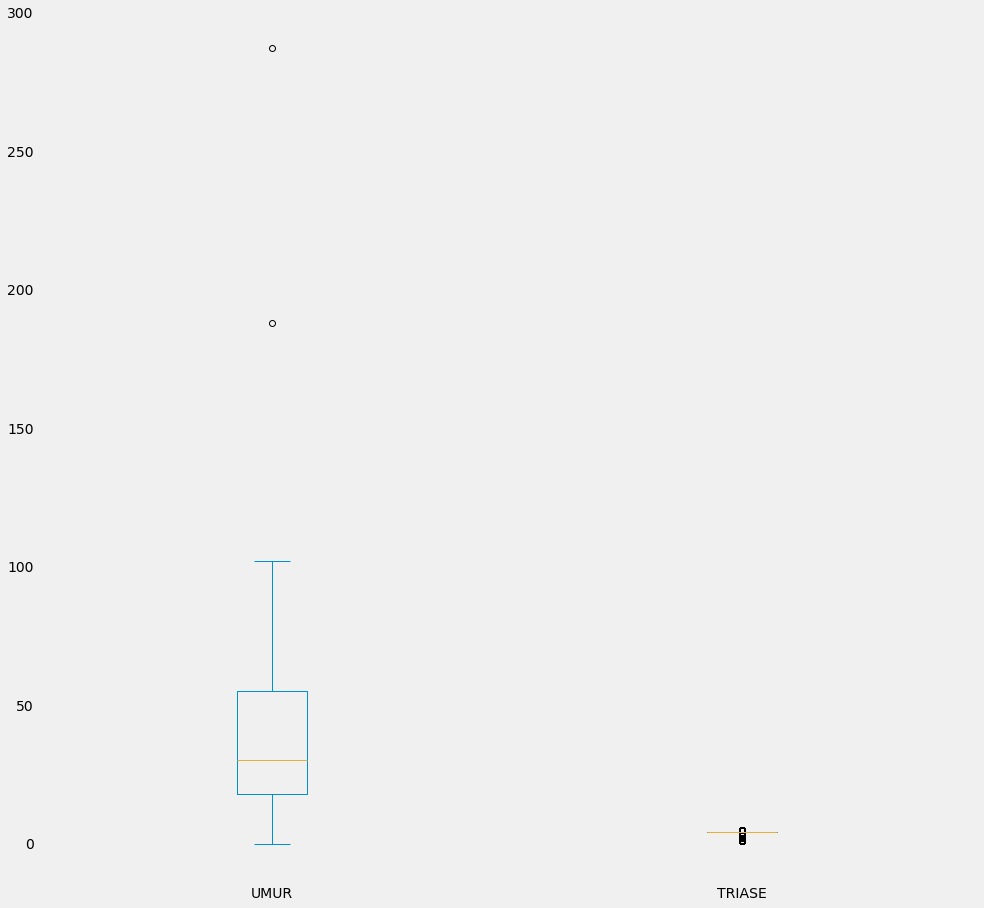

In [ ]:
dfed[num].plot(kind='box',figsize=(15,15))
plt.grid(False)
plt.show()

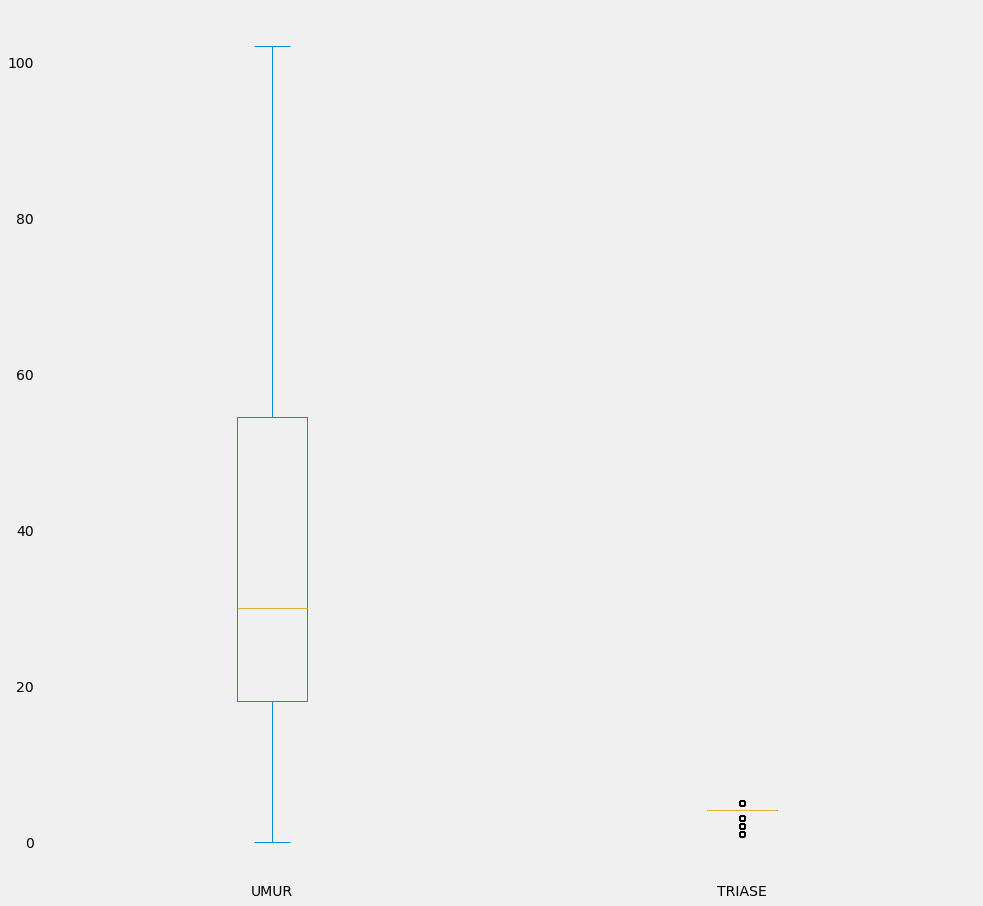

In [ ]:
q1=dfed[['UMUR']].quantile(0.25)
q3=dfed[['UMUR']].quantile(0.75)
IQR=q3-q1
max=q3+1.5*IQR
indexOutlier=dfed[dfed['UMUR']>float(max)].index
dfed.drop(indexOutlier,inplace=True)
dfed[num].plot(kind='box',figsize=(15,15))
plt.grid(False)
plt.show()

In [ ]:
dfed[num].describe().T

,count,mean,std,min,25%,50%,75%,max
UMUR,16211.0,34.728402,23.041840,0.0,18.0,30.0,54.5,102.0
TRIASE,16211.0,4.052619,0.625793,1.0,4.0,4.0,4.0,5.0


In [ ]:
dfed[cat].describe().T

,count,unique,top,freq
JENIS_KELAMIN,16211,3,P,8142
RAWAT,16211,2,YES,12769
RUJUK?,16211,2,NO,16064
PULANG?,16211,2,NO,12948
DOR?,16211,2,NO,16100
DOA?,16211,2,NO,16193
CARDIAC_ARREST?,16211,2,NO,16136
CHEST_PAIN?,16211,2,NO,16012
ABDOMINAL_PAIN?,16211,2,NO,15282
EPIGASTRIC_PAIN?,16211,2,NO,16172


In [ ]:
x=dfed.drop(columns=['TRIASE']).copy()
y=dfed['TRIASE'].copy()

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,stratify=y,random_state=11)

print(f'training size: {xtrain.shape[0]} ({100*xtrain.shape[0]/x.shape[0]:.2f}%)')
print(f'test size: {xtest.shape[0]} ({100*xtest.shape[0]/x.shape[0]:.2f}%)')

training size: 12968 (80.00%)
test size: 3243 (20.00%)


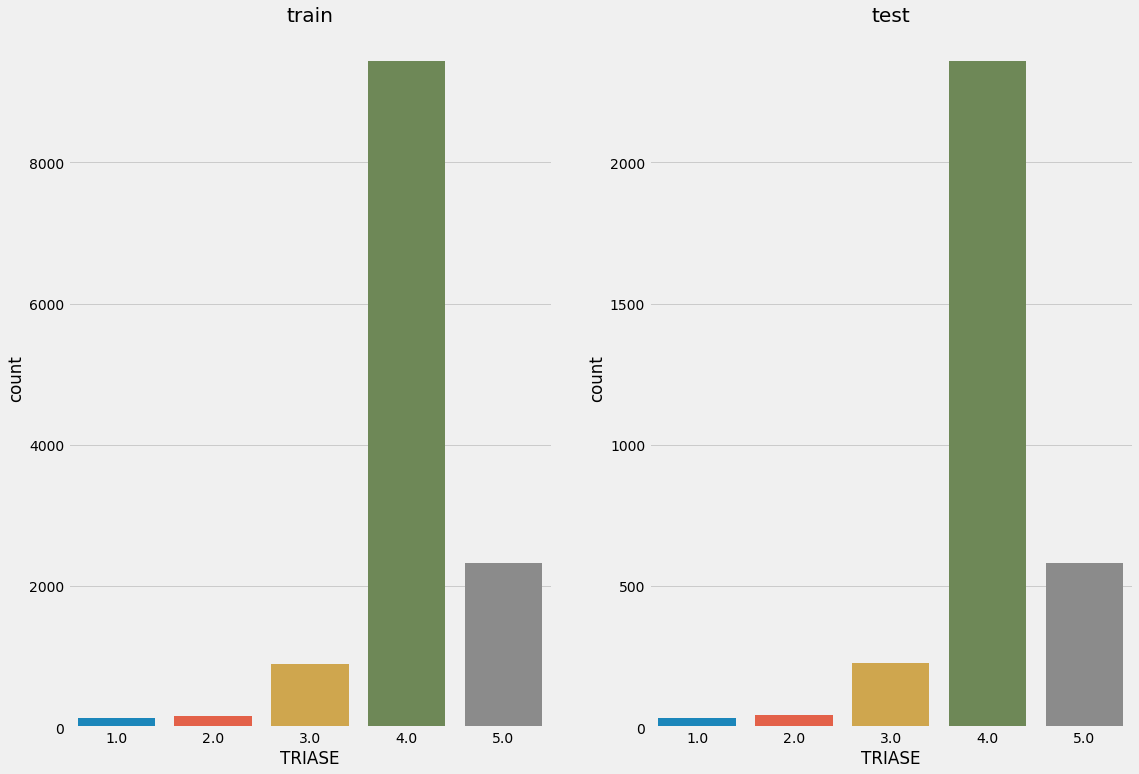

In [ ]:
fig,axis=plt.subplots(1,2,figsize=(17,12))
for i,label in enumerate([(ytrain,'train'),(ytest,'test')]):
  sns.countplot(x=label[0],ax=axis[i])
  axis[i].set_title(label[1])
plt.show()

In [ ]:
print("Before oversampling: ", Counter(ytrain))

Before oversampling:  Counter({4.0: 9439, 5.0: 2325, 3.0: 903, 2.0: 165, 1.0: 136})


In [ ]:
oversample=RandomOverSampler(sampling_strategy='not majority')

In [ ]:
xtrain_ov,ytrain_ov=oversample.fit_resample(xtrain,ytrain)

In [ ]:
print("After oversampling: ", Counter(ytrain_ov))

After oversampling:  Counter({4.0: 9439, 1.0: 9439, 5.0: 9439, 3.0: 9439, 2.0: 9439})


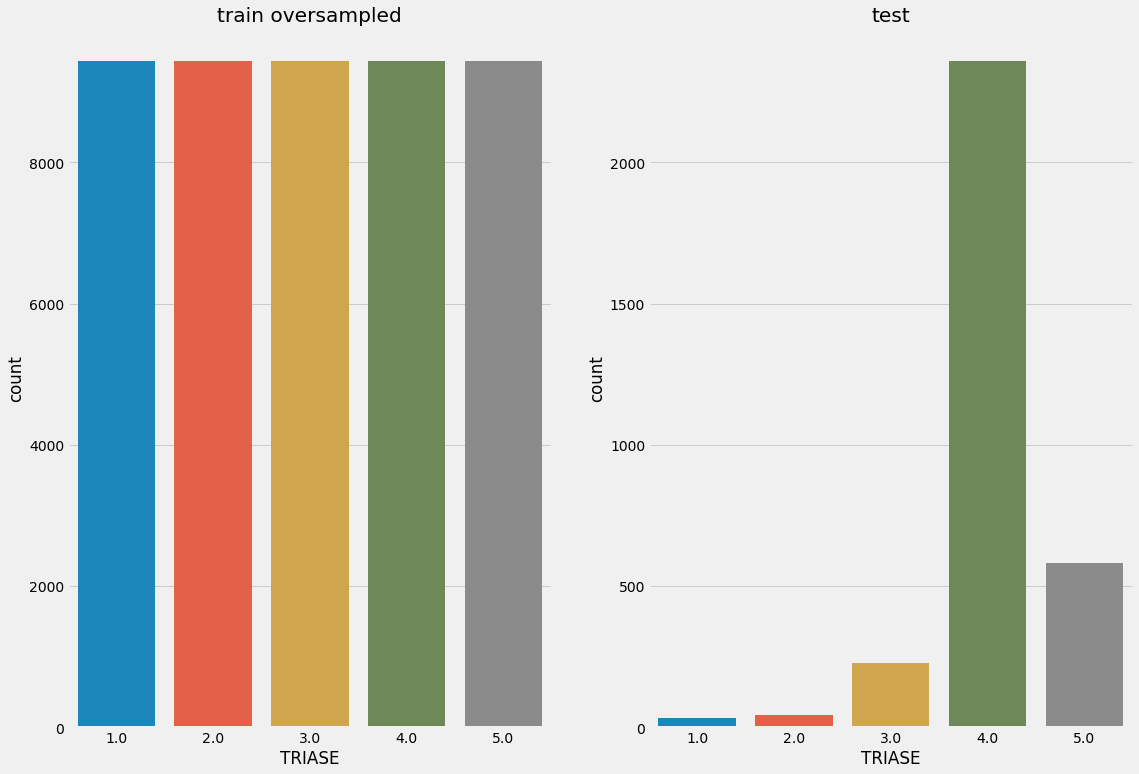

In [ ]:
fig,axis=plt.subplots(1,2,figsize=(17,12))
for i,label in enumerate([(ytrain_ov,'train oversampled'),(ytest,'test')]):
  sns.countplot(x=label[0],ax=axis[i])
  axis[i].set_title(label[1])
plt.show()

In [ ]:
nomfeat=['JENIS_KELAMIN','RAWAT','RUJUK?','PULANG?','DOR?','DOA?','CARDIAC_ARREST?',
         'CHEST_PAIN?','ABDOMINAL_PAIN?','EPIGASTRIC_PAIN?','KEJANG?','DEMAM?','ASTHMA?',
         'MCU?','PENURUNAN_KESADARAN?','CHRONIC_KIDNEY_DISEASE?',
         'KECELAKAAN_LL?','VERTIGO?','VL?','VE?','HT?','VOMITUS?','DM?']
orfeat=x.select_dtypes(include='object').drop(columns=nomfeat).columns.tolist()
print(nomfeat)
print(orfeat)

['JENIS_KELAMIN', 'RAWAT', 'RUJUK?', 'PULANG?', 'DOR?', 'DOA?', 'CARDIAC_ARREST?', 'CHEST_PAIN?', 'ABDOMINAL_PAIN?', 'EPIGASTRIC_PAIN?', 'KEJANG?', 'DEMAM?', 'ASTHMA?', 'MCU?', 'PENURUNAN_KESADARAN?', 'CHRONIC_KIDNEY_DISEASE?', 'KECELAKAAN_LL?', 'VERTIGO?', 'VL?', 'VE?', 'HT?', 'VOMITUS?', 'DM?']
['CEDERA_KEPALA', 'KASUS', 'KONSUL_SPESIALIS?']


In [ ]:
onehot=OneHotEncoder()
onehot.fit(xtrain_ov[nomfeat])
xtrain_oh=pd.DataFrame(onehot.transform(xtrain_ov[nomfeat]).toarray(),columns=onehot.get_feature_names_out())
xtest_oh=pd.DataFrame(onehot.transform(xtest[nomfeat]).toarray(),columns=onehot.get_feature_names_out())
display(xtrain_oh)

ordinal=OrdinalEncoder()
ordinal.fit(xtrain_ov[orfeat])
xtrain_or=pd.DataFrame(ordinal.transform(xtrain_ov[orfeat]),columns=ordinal.feature_names_in_)
xtest_or=pd.DataFrame(ordinal.transform(xtest[orfeat]),columns=ordinal.feature_names_in_)
display(xtrain_or)

,JENIS_KELAMIN_L,JENIS_KELAMIN_P,JENIS_KELAMIN_UNKNOWN,RAWAT_NO,RAWAT_YES,RUJUK?_NO,RUJUK?_YES,PULANG?_NO,PULANG?_YES,DOR?_NO,...,VL?_NO,VL?_YES,VE?_NO,VE?_YES,HT?_NO,HT?_YES,VOMITUS?_NO,VOMITUS?_YES,DM?_NO,DM?_YES
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47190,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
47191,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
47192,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
47193,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


,CEDERA_KEPALA,KASUS,KONSUL_SPESIALIS?
0,1.0,8.0,0.0
1,3.0,9.0,0.0
2,3.0,7.0,1.0
3,3.0,22.0,0.0
4,3.0,20.0,1.0
...,...,...,...
47190,3.0,9.0,0.0
47191,3.0,9.0,0.0
47192,3.0,7.0,0.0
47193,3.0,14.0,0.0


In [ ]:
xtrain_comb=pd.concat([xtrain_ov['UMUR'].reset_index(drop=True),xtrain_oh,xtrain_or],axis=1)
xtest_comb=pd.concat([xtest['UMUR'].reset_index(drop=True),xtest_oh,xtest_or],axis=1)
xtrain_comb

,UMUR,JENIS_KELAMIN_L,JENIS_KELAMIN_P,JENIS_KELAMIN_UNKNOWN,RAWAT_NO,RAWAT_YES,RUJUK?_NO,RUJUK?_YES,PULANG?_NO,PULANG?_YES,...,VE?_YES,HT?_NO,HT?_YES,VOMITUS?_NO,VOMITUS?_YES,DM?_NO,DM?_YES,CEDERA_KEPALA,KASUS,KONSUL_SPESIALIS?
0,23.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,8.0,0.0
1,29.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,9.0,0.0
2,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,7.0,1.0
3,51.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,22.0,0.0
4,59.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47190,43.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,9.0,0.0
47191,19.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,9.0,0.0
47192,17.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,7.0,0.0
47193,19.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,14.0,0.0


In [ ]:
model=KNeighborsClassifier()

In [ ]:
model.fit(xtrain_comb,ytrain_ov)

KNeighborsClassifier()

In [ ]:
pred_train=model.predict(xtrain_comb)
pred_test=model.predict(xtest_comb)

In [ ]:
print('Classification Report Train Data k - NN')
print(classification_report(ytrain_ov,pred_train))
print('Classification Report Test Data k - NN')
print(classification_report(ytest,pred_test))

Classification Report Train Data k - NN
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      9439
         2.0       0.95      0.98      0.96      9439
         3.0       0.89      0.95      0.92      9439
         4.0       0.98      0.89      0.94      9439
         5.0       0.98      0.98      0.98      9439

    accuracy                           0.96     47195
   macro avg       0.96      0.96      0.96     47195
weighted avg       0.96      0.96      0.96     47195

Classification Report Test Data k - NN
              precision    recall  f1-score   support

         1.0       0.50      0.44      0.47        34
         2.0       0.10      0.19      0.13        42
         3.0       0.30      0.54      0.38       226
         4.0       0.96      0.87      0.91      2360
         5.0       0.91      0.93      0.92       581

    accuracy                           0.84      3243
   macro avg       0.55      0.59      0.56      324

Confusion Matrix Train Data k - NN


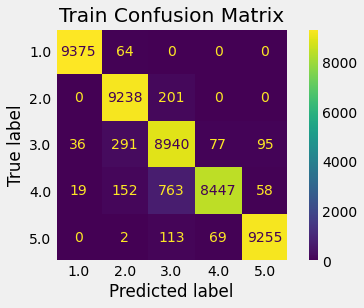

Confusion Matrix Test Data k - NN


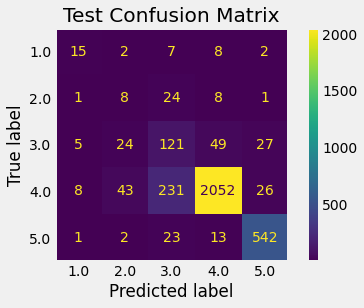

In [ ]:
print('Confusion Matrix Train Data k - NN')
ConfusionMatrixDisplay.from_predictions(ytrain_ov, pred_train)
plt.title("Train Confusion Matrix")
plt.grid(False)
plt.show()

print('Confusion Matrix Test Data k - NN')
ConfusionMatrixDisplay.from_predictions(ytest, pred_test)
plt.title("Test Confusion Matrix")
plt.grid(False)
plt.show()